<a href="https://colab.research.google.com/github/gracegloger/bme3053c/blob/main/lessons/supervised_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [2]:
#Provide your code for part 1-1 here
# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


In [3]:
#Provide your code for part 1-2 here
# Print dataset dimensions and size
print("Dataset dimensions:", X.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

# Print number of unique classes
print("\nNumber of classes:", len(np.unique(y)))



Dataset dimensions: (70000, 784)
Number of samples: 70000
Number of features: 784

Number of classes: 10


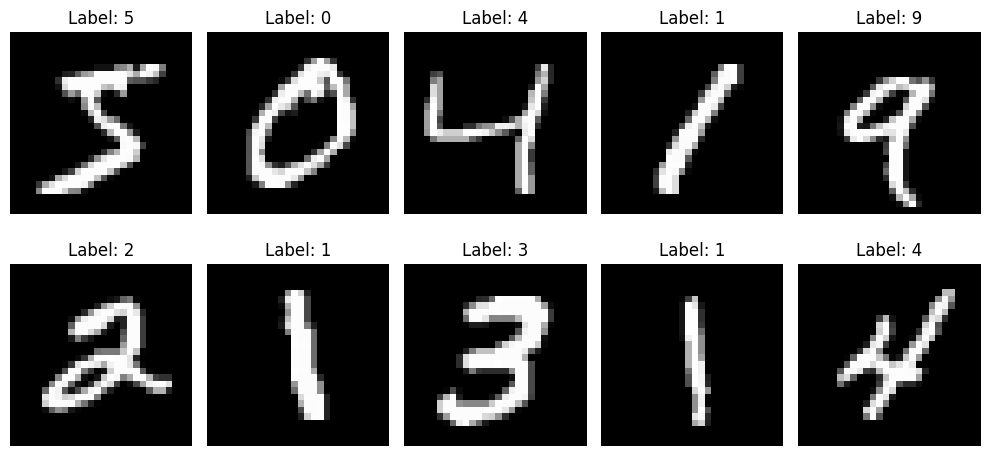

In [4]:
#Provide your code for part 1-3 here
# Visualize sample digits from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [5]:
# Provide your code for part 2 here
# Scale pixel values to range [0,1]
X = X / 255.0
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
# Create and fit StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Transform training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes of scaled datasets
print("\nScaled training set shape:", X_train_scaled.shape)
print("Scaled test set shape:", X_test_scaled.shape)
# Transform training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes of scaled datasets
print("\nScaled training set shape:", X_train_scaled.shape)
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Training set shape: (56000, 784)
Test set shape: (14000, 784)

Scaled training set shape: (56000, 784)
Scaled test set shape: (14000, 784)

Scaled training set shape: (56000, 784)
Training set shape: (56000, 784)
Test set shape: (14000, 784)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [6]:
# Provide your code for part 3-1 here
# Create and train logistic regression model with default parameters
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_log = log_reg.predict(X_test_scaled)

# Calculate and print accuracy score
log_reg_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")


c:\Users\Owner\miniconda3\envs\bme3053c\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9150


In [7]:
# Provide your code for part 3-2 here
# Create and train neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), 
                        solver='adam', 
                        learning_rate_init=0.001,
                        random_state=42)

nn_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Calculate and print accuracy score
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")


Neural Network Accuracy: 0.9718


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


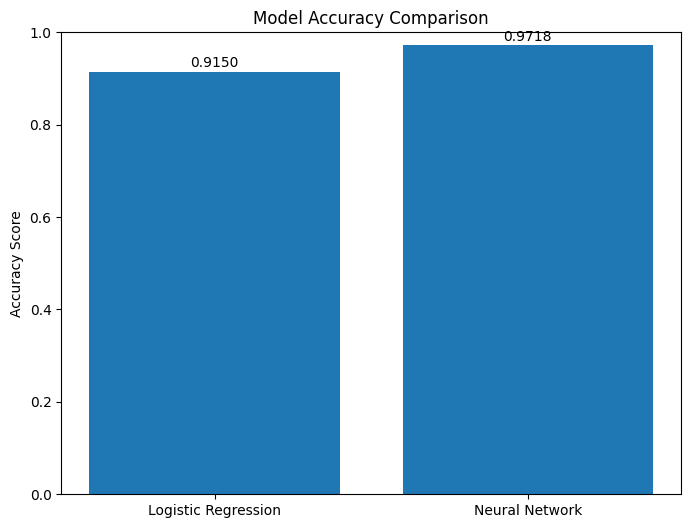

In [8]:
# Provide your code for part 4-1 here
# Create data for the bar plot
models = ['Logistic Regression', 'Neural Network']
accuracies = [log_reg_accuracy, nn_accuracy]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylim(0, 1)  # Set y-axis from 0 to 1 since accuracy is between 0 and 1
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')

# Add value labels on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')

plt.show()



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.88      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.89      0.86      0.87      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.92      0.91     14000


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.99      0.99      0.99      1

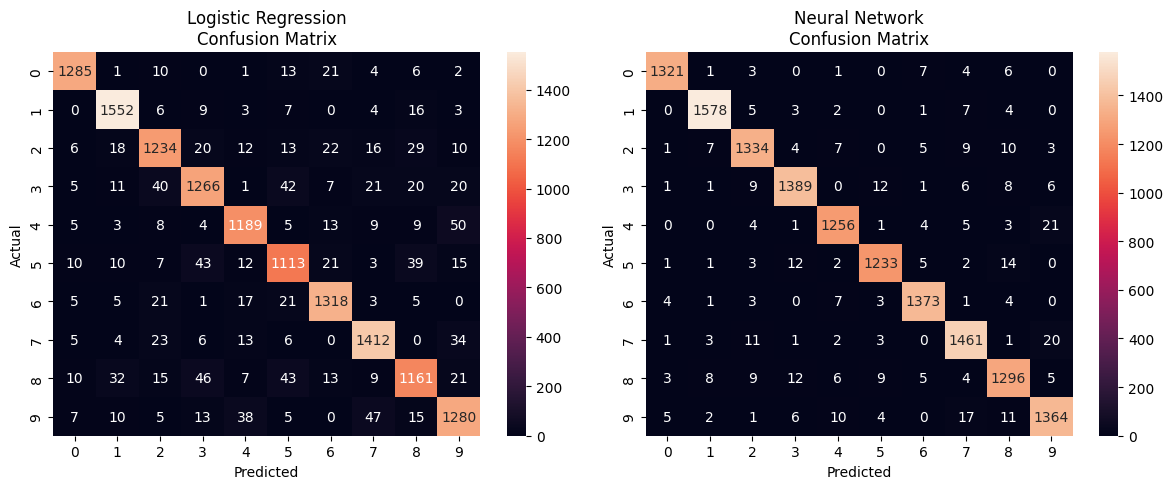

In [9]:
# Provide your code for part 4-2 here
# Print classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Create confusion matrices
log_cm = confusion_matrix(y_test, y_pred_log)
nn_cm = confusion_matrix(y_test, y_pred_nn)

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression confusion matrix
sns.heatmap(log_cm, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Neural Network confusion matrix
sns.heatmap(nn_cm, annot=True, fmt='d', ax=ax2)
ax2.set_title('Neural Network\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()


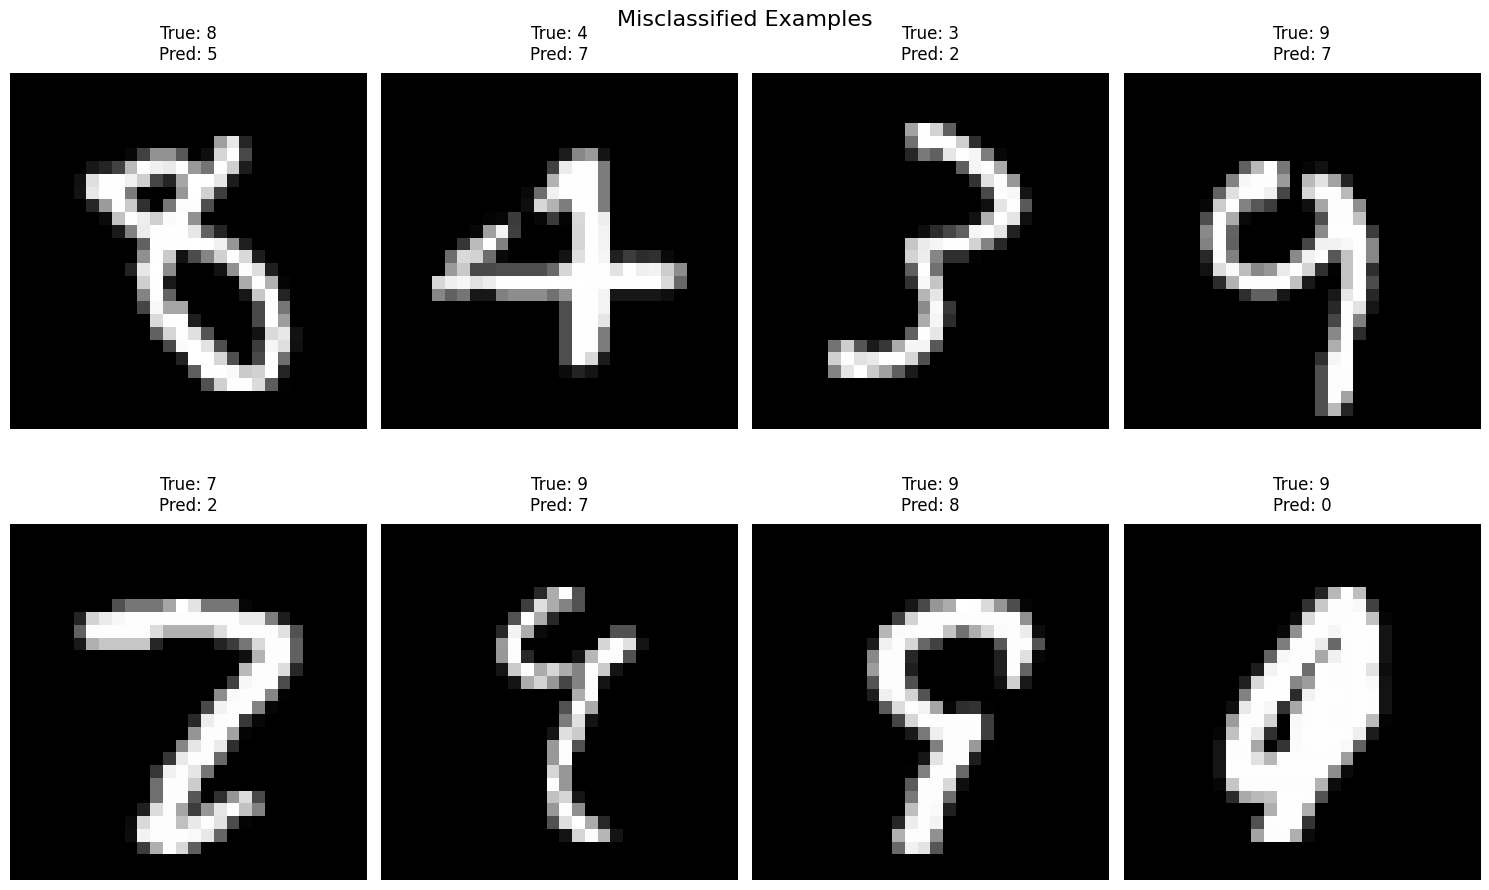

Total misclassifications (Logistic Regression): 1190
Total misclassifications (Neural Network): 395


In [13]:
# Provide your code for part 4-3 here
# Get indices of misclassified examples for both models
misclassified_log = np.where(y_pred_log != y_test)[0]
misclassified_nn = np.where(y_pred_nn != y_test)[0]

# Create a figure with subplots, increase height to accommodate labels
fig, axes = plt.subplots(2, 4, figsize=(15, 10))  # Increased height from 8 to 10
fig.suptitle('Misclassified Examples', fontsize=16, y=0.95)  # Adjusted title position

# Plot some misclassified examples for Logistic Regression
for i, idx in enumerate(misclassified_log[:4]):
    axes[0, i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    # Move title above the image
    axes[0, i].set_title(f'True: {y_test[idx]}\nPred: {y_pred_log[idx]}', pad=10)

# Plot some misclassified examples for Neural Network
for i, idx in enumerate(misclassified_nn[:4]):
    axes[1, i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
    # Move title above the image
    axes[1, i].set_title(f'True: {y_test[idx]}\nPred: {y_pred_nn[idx]}', pad=10)

plt.tight_layout()
plt.show()

# Print total number of misclassifications for each model
print(f"Total misclassifications (Logistic Regression): {len(misclassified_log)}")
print(f"Total misclassifications (Neural Network): {len(misclassified_nn)}")